In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def calculate_cost(X, y, w_in, b_in):
    # using the mean squared error function as the cost function
    m, n = X.shape
    error = 0
    for i in range(m):
        y_hat = np.dot(w_in, X[i]) + b_in
        error += (y_hat - y[i])**2
    error = error/(2*m)
    return error

In [49]:
def gradient_descent(X, y, w_in, b_in, alpha):
    m, n = X.shape

    dj_dw_i_temp = 0
    for i in range(m):
        y_hat = np.dot(w_in, X[i]) + b_in
        dj_dw_i_temp += (y_hat - y[i])*X[i]
    dj_dw = dj_dw_i_temp/m
    w_in = w_in - alpha*dj_dw

    dj_db_temp = 0
    for i in range(m):
        y_hat = np.dot(w_in, X[i]) + b_in
        dj_db_temp += (y_hat - y[i])
    dj_db = dj_db_temp/m

    b_in = b_in - alpha*dj_db

    return w_in, b_in

In [50]:
gradient_descent(X, y, w_in, b_in, 0.0001)

(array([0.0285, 0.2025, 1.5333]), -0.027139275000000004)

In [97]:
def poly_regression(X, y, w_in, b_in, iterations=1000000, alpha=0.00002, results_showing_interval=100000):
    curr_itr = 1
    cost = 0
    h_costs = []
    while curr_itr <= iterations:
        cost = calculate_cost(X, y, w_in, b_in)
        w_in, b_in = gradient_descent(X, y, w_in, b_in, alpha)
        if curr_itr%results_showing_interval==0:
            h_costs.append(cost)
            print(f"iteration: {curr_itr} :: cost: {cost}")
        curr_itr += 1
    print(f"final value of w: {w_in} and b: {b_in}")
    return w_in, b_in, h_costs

In [98]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
X = np.c_[x, x**2, x**3]
y = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [99]:
w_in = np.zeros((X.shape[1],))
b_in = 0

In [100]:
w, b, h_costs = poly_regression(X, y, w_in, b_in)

iteration: 100000 :: cost: 2.757382350233312
iteration: 200000 :: cost: 1.2200760558088983
iteration: 300000 :: cost: 0.7922188470186989
iteration: 400000 :: cost: 0.5851648422549282
iteration: 500000 :: cost: 0.44574723683637146
iteration: 600000 :: cost: 0.3418174676008269
iteration: 700000 :: cost: 0.26248971847806063
iteration: 800000 :: cost: 0.20163191391896476
iteration: 900000 :: cost: 0.15489356057656428
iteration: 1000000 :: cost: 0.11899073731330798
final value of w: [ 8.65015677  0.32124833 -0.02120367] and b: 1.2978162143032388


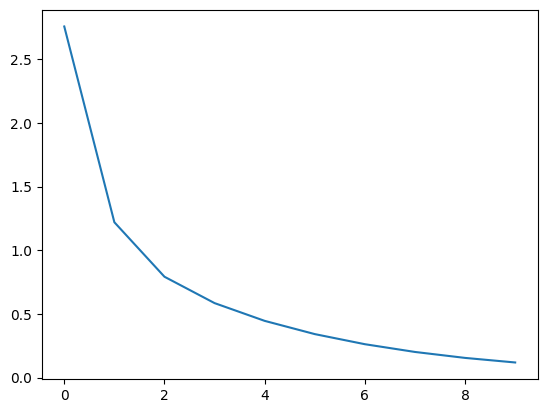

In [103]:
plt.plot(h_costs)

In [106]:
predictions = []
m = X.shape[0]
for i in range(m):
    y_hat = np.dot(w, X[i]) + b
    predictions.append(y_hat)

In [107]:
predictions

[1.2978162143032388,
 10.248017642574052,
 19.713493717598748,
 29.567022431622693,
 39.681381776891236,
 49.92934974564973,
 60.18370433014354,
 70.31722352261802,
 80.20268531531852,
 89.71286770049038]

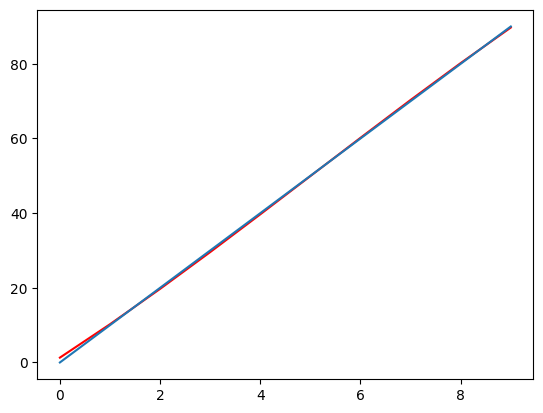

In [115]:
plt.plot(predictions, c='red')
plt.plot(y)
plt.show()